In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
df=pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv',header=1)

In [24]:
df.head(2)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 247 entries, ('day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI') to ('30', '09', '2012', '24', '64', '15', '0.2', '67.3', '3.8', '16.5', '1.2', '4.8', '0.5')
Data columns (total 1 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Bejaia Region Dataset   245 non-null    object
dtypes: object(1)
memory usage: 49.3+ KB


In [25]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [30]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [31]:
df.loc[:122,"Region"]=0
df.loc[122:,"Region"]=1

In [32]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0


In [34]:
df = df.drop(122).reset_index(drop=True)


In [35]:
df[df.isnull().any(axis=1)]


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
166,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN,1.0


In [36]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
Region         0
dtype: int64

In [42]:


df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
166,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN,1.0


In [45]:
df=df.dropna().reset_index(drop=True)

In [46]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region


In [47]:
df.shape

(244, 15)

In [49]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1.0


In [50]:
df=df.drop(122).reset_index(drop=True)

In [51]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1.0


In [52]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [55]:
df=df.rename(columns={'Classes  ':'Classes'})

In [56]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    object 
 1   month        243 non-null    object 
 2   year         243 non-null    object 
 3   Temperature  243 non-null    object 
 4    RH          243 non-null    object 
 5    Ws          243 non-null    object 
 6   Rain         243 non-null    object 
 7   FFMC         243 non-null    object 
 8   DMC          243 non-null    object 
 9   DC           243 non-null    object 
 10  ISI          243 non-null    object 
 11  BUI          243 non-null    object 
 12  FWI          243 non-null    object 
 13  Classes      243 non-null    object 
 14  Region       243 non-null    float64
dtypes: float64(1), object(14)
memory usage: 28.6+ KB


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4    RH          243 non-null    int64  
 5    Ws          243 non-null    int64  
 6   Rain         243 non-null    object 
 7   FFMC         243 non-null    object 
 8   DMC          243 non-null    object 
 9   DC           243 non-null    object 
 10  ISI          243 non-null    object 
 11  BUI          243 non-null    object 
 12  FWI          243 non-null    object 
 13  Classes      243 non-null    object 
 14  Region       243 non-null    float64
dtypes: float64(1), int64(6), object(8)
memory usage: 28.6+ KB


In [65]:
df[['month','day','year','Temperature',' RH',' Ws']]=df[['month','day','year','Temperature',' RH',' Ws']].astype(int)

In [67]:
df['Classes']

0       not fire   
1       not fire   
2       not fire   
3       not fire   
4       not fire   
           ...     
238         fire   
239     not fire   
240     not fire   
241     not fire   
242    not fire    
Name: Classes, Length: 243, dtype: object

In [69]:
df[['Rain ', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Region']]=df[['Rain ', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Region']].astype(float)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4    RH          243 non-null    int64  
 5    Ws          243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    float64
dtypes: float64(8), int64(6), object(1)
memory usage: 28.6+ KB


In [71]:
df.to_csv('Algerian_forest_fires_dataset_cleaned.csv')

In [72]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [73]:
df['Classes']=np.where(df['Classes'].str.contains('not fire'),0,1)

In [74]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

<Axes: xlabel='Temperature', ylabel='Count'>

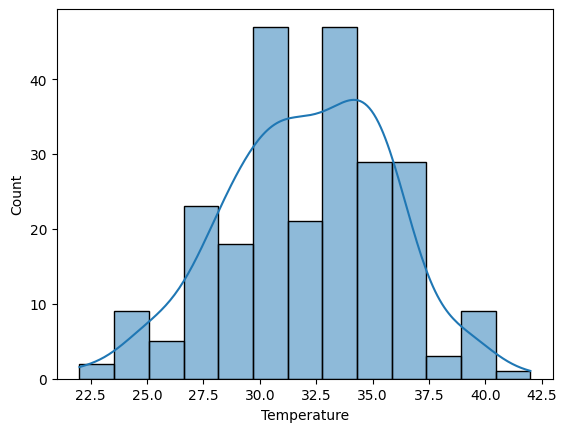

In [79]:
sns.histplot(data=df,x='Temperature',kde=True)

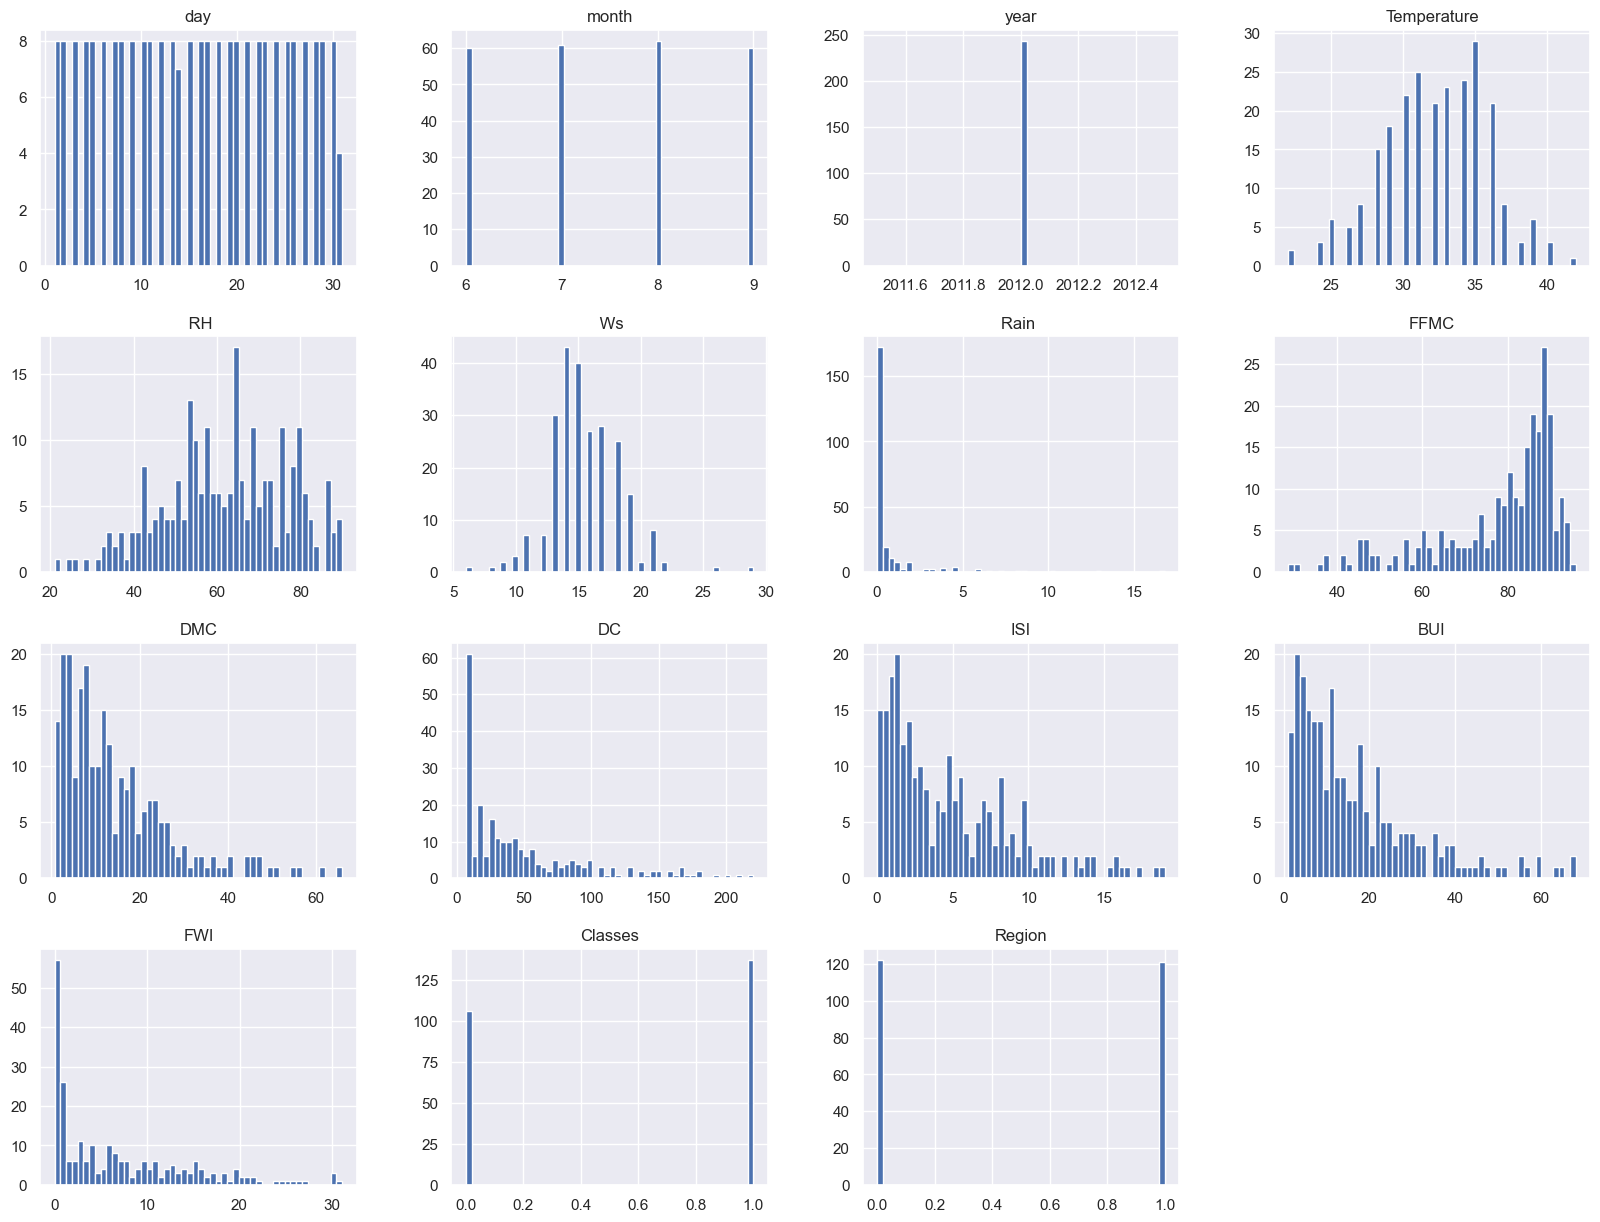

In [83]:

sns.set()
df.hist(bins=50, figsize=(20,15))
plt.show()


In [98]:
var=df['Classes'].value_counts()
print(var)


Classes
1    137
0    106
Name: count, dtype: int64


([<matplotlib.patches.Wedge at 0x1d1319a08b0>,
 [Text(-0.2189564657232264, 1.0779879712306597, '1'),
  Text(0.21895655996393085, -1.0779879520888727, '0')],
 [Text(-0.11943079948539621, 0.5879934388530871, '56.4%'),
  Text(0.11943085088941681, -0.5879934284121123, '43.6%')])

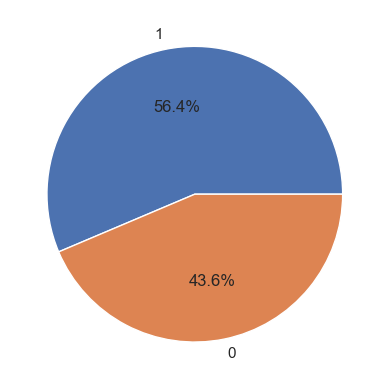

In [100]:
classlabels=[1,0]
plt.pie(var,labels=classlabels,autopct='%1.1f%%')

<Axes: >

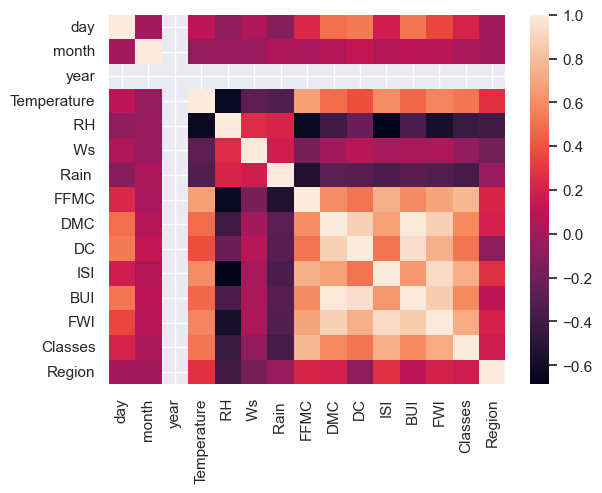

In [101]:
sns.heatmap(df.corr())

In [102]:
df.corr()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
day,1.000000,-0.000369,NaN,0.097227,-0.076034,0.047812,-0.112523,0.224956,0.491514,0.527952,0.180543,0.517117,0.350781,0.202840,0.000821
month,-0.000369,1.000000,NaN,-0.056781,-0.041252,-0.039880,0.034822,0.017030,0.067943,0.126511,0.065608,0.085073,0.082639,0.024004,0.001857
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,0.097227,-0.056781,NaN,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.076034,-0.041252,NaN,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,0.047812,-0.039880,NaN,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.112523,0.034822,NaN,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.224956,0.017030,NaN,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.491514,0.067943,NaN,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.527952,0.126511,NaN,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4    RH          243 non-null    int64  
 5    Ws          243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    int64  
 14  Region       243 non-null    float64
dtypes: float64(8), int64(7)
memory usage: 28.6 KB


In [104]:
df=df.drop(['day','month','year'],axis=1)

In [105]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0.0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0.0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0.0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0.0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0.0


In [107]:
x=df.drop(['FWI'],axis=1)
y=df['FWI']

In [111]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [113]:
x_train.shape , x_test.shape

((182, 11), (61, 11))

<Axes: >

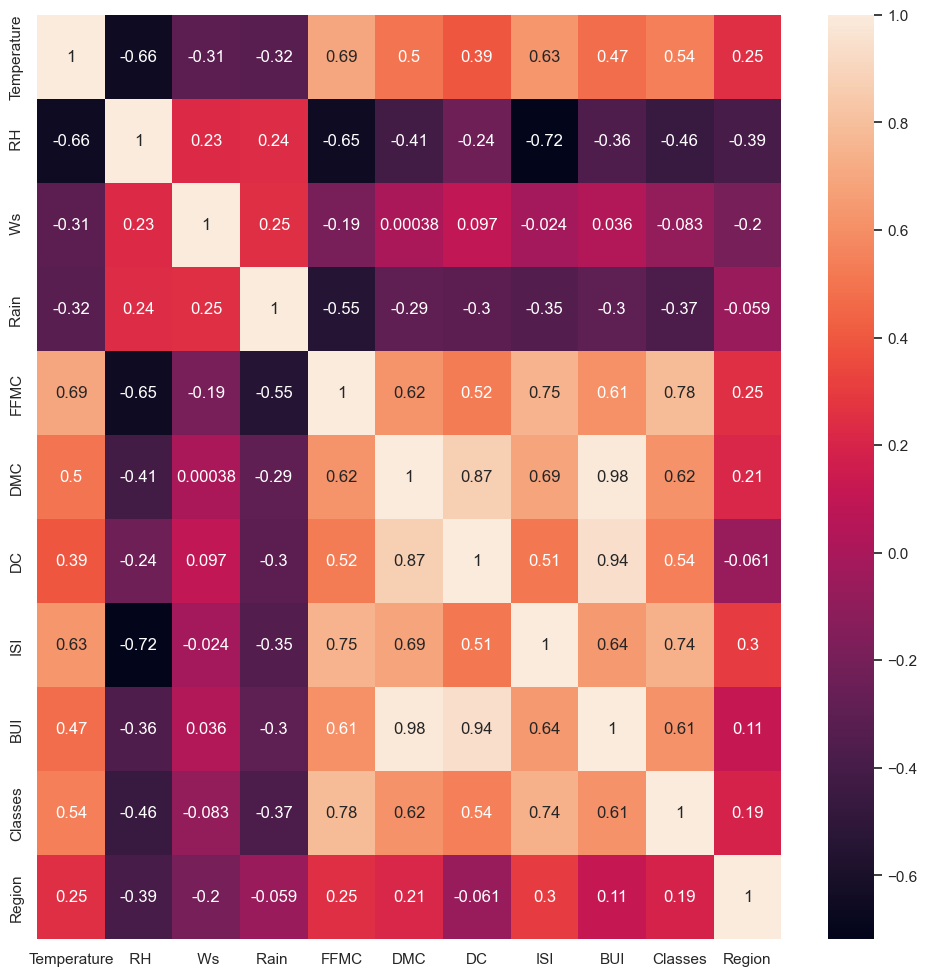

In [120]:
#feature selection:
plt.figure(figsize=(12,12))
sns.heatmap(x_train.corr(),annot=True)

In [135]:
matrix=df.corr()
print(matrix.iloc[11][11])

1.0


C:\Users\vatsa\AppData\Local\Temp\ipykernel_8016\387719294.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(matrix.iloc[11][11])


In [136]:
def performFeatureSelection(dataset, threshold):
    highCorrelatedFeatures = set()
    matrix = dataset.corr()
    for i in range(matrix.shape[0]):
        for j in range(i):
            if abs(matrix.iloc[i, j]) > threshold:
                colname = matrix.columns[i]
                highCorrelatedFeatures.add(colname)
    return highCorrelatedFeatures


In [137]:
highlyCorrelated=performFeatureSelection(x_train,0.85)

In [138]:
highlyCorrelated

{'BUI', 'DC'}

In [139]:
x_train.drop(highlyCorrelated,axis=1,inplace=True)
x_test.drop(highlyCorrelated,axis=1,inplace=True)

In [140]:
x_train.shape

(182, 9)

In [142]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

Linear Regression


In [144]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
score=r2_score(y_pred,y_test)

In [145]:
print(score)

0.9839977157632893


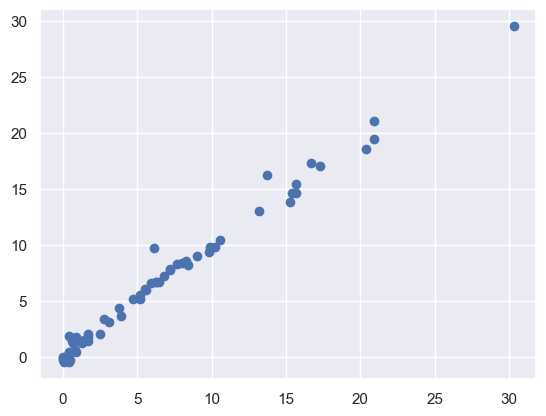

In [150]:

plt.scatter(y_test,y_pred)

Ridge Regression:

Mean absolute error 0.5642305340105715
R2 Score 0.9842993364555512


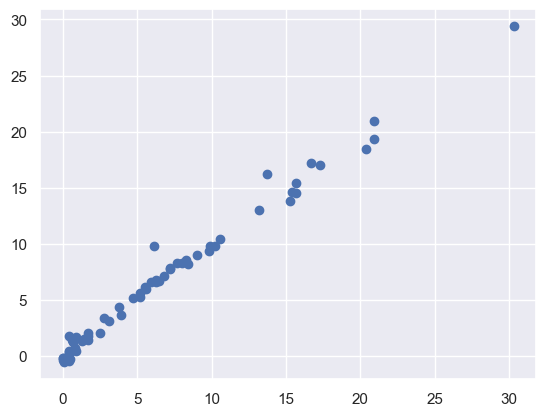

In [151]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge=Ridge()
ridge.fit(x_train,y_train)
y_pred=ridge.predict(x_test)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

Lasso Regression

Mean absolute error 1.133175994914409
R2 Score 0.9492020263112388


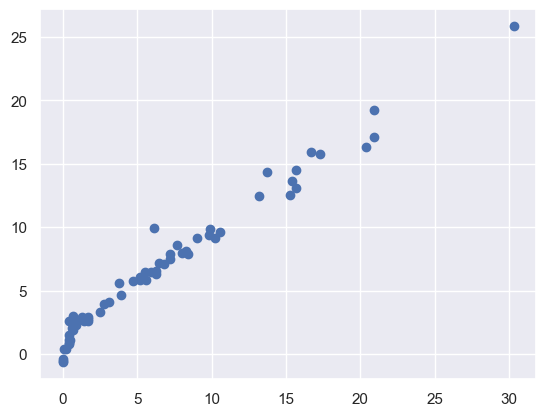

In [152]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
Lasso=Lasso()
Lasso.fit(x_train,y_train)
y_pred=Lasso.predict(x_test)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

ElasticNet regression

Mean absolute error 1.8822353634896005
R2 Score 0.8753460589519703


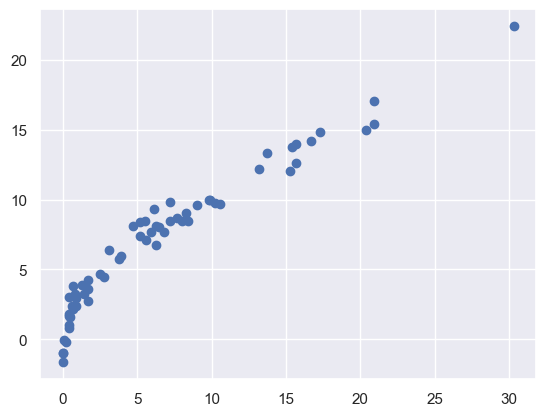

In [153]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ElasticNet=ElasticNet()
ElasticNet.fit(x_train,y_train)
y_pred=ElasticNet.predict(x_test)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

Hyperparameter tuning:
Hyperparameters are parameters not learned by the model itself — they are set before training.
Tuning hyperparameters means adjusting them to find the combination that gives the best model performance.

In simple Linear Regression:
There are no hyperparameters (just coefficients and intercept which are learned from data).

But for regularized linear regression models (like Ridge, Lasso, ElasticNet):
Hyperparameter tuning refers to finding the best values for parameters like:

alpha (λ) — the regularization strength
High alpha = more penalty (simpler model, less overfitting)
Low alpha = less penalty (more flexibility, but can overfit)


In [154]:
from sklearn.linear_model import RidgeCV
model=RidgeCV(cv=5)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
score=r2_score(y_pred,y_test)
print(score)

0.9834070933284211


In [155]:
from sklearn.linear_model import LassoCV
model=LassoCV(cv=5)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
score=r2_score(y_pred,y_test)
print(score)

0.980851982434192


In [156]:
from sklearn.linear_model import ElasticNetCV
model=ElasticNetCV(cv=5)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
score=r2_score(y_pred,y_test)
print(score)

0.9799084998743879
